<h1>Import Libraries</h1>


In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# To display all results in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<h1>Import Test and Training Set</h1>

In [3]:
# Import csv file and store them as pandas objects
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [4]:
print('The train set has the shape {}'.format(train.shape))
train.head(5)
train.columns

The train set has the shape (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.count() #Is there any NaN cell among 891 entries?

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [121]:
test.head(5)
test.columns

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [67]:
test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

Comment:
1. 2 people not known where they got aboard
2. 187 age figures were missing

22nd March: 
Previously, the missing age figures were cleaned up by inserting 0. This lowers down the mean/median of the age column. 

<h1>Problem</h1>

<u>To predict the survival status of passengers in the test set.</u>
* Supervised learning problem
* Outcome is dead or alive (0 or 1). This is a classification problem.
* Denote Survived as Y. Every other column of the training set can become independent variables X so long as useful information is extracted.
* Normalization of continuous variables (age, fare) is recommended.
* The train data can also be splitted into train and dev set in 70% to 30% proportion. 

<h1>Data Visualization</h1>

Categorize data and visualize relationship between different factors and survival status by the following two methods:

1. Groupby
2. Barplot (Seaborn)

<h2>Sex</h2>

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


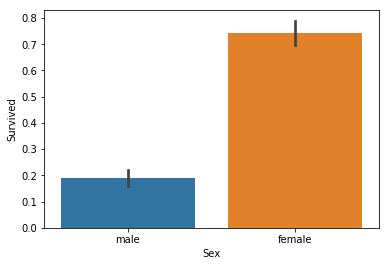

In [6]:
train.groupby(['Sex']).mean()
sns.barplot(x='Sex', y='Survived', data=train)

In [7]:
#Convert the sex label of passengers into boolean values, where male = 1 and non-male =0
train['Sex'] = (train['Sex'] == 'male')*1
test['Sex'] = (test['Sex'] == 'male')*1

In [8]:
train[['Sex','Survived']].corr()

,Sex,Survived
Sex,1.000000,-0.543351
Survived,-0.543351,1.000000


Comment: corr=-0.543351 indicates mild correlation between survival and sex. Male were more likely succumbed than female. 

<h2>Ticket Class (Pclass)</h2>

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,,
1,461.597222,0.629630,0.564815,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,0.586957,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,0.706721,25.140620,0.615071,0.393075,13.675550


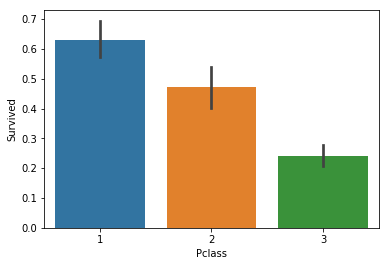

In [9]:
train.groupby(['Pclass']).mean()
sns.barplot(x='Pclass', y='Survived', data=train)

One may also group by ticket class and sex as follows:

PassengerId  Survived        Age     SibSp     Parch        Fare
Pclass Sex                                                                  
1      0     469.212766  0.968085  33.978723  0.553191  0.457447  106.125798
       1     455.729508  0.368852  38.995246  0.311475  0.278689   67.226127
2      0     443.105263  0.921053  28.703947  0.486842  0.605263   21.970121
       1     447.962963  0.157407  30.512315  0.342593  0.222222   19.741782
3      0     399.729167  0.500000  23.572917  0.895833  0.798611   16.118810
       1     455.515850  0.135447  26.911873  0.498559  0.224784   12.661633

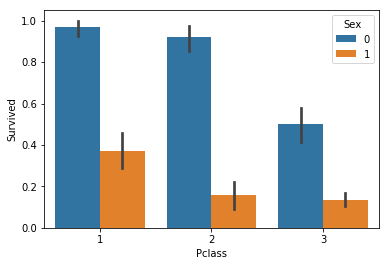

In [52]:
train.groupby(['Pclass','Sex']).mean()
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)

<h1>Age</h1>

In [11]:
#Calculate the age median from train and test set
allage = pd.concat([train['Age'],test['Age']]) #combine train['Age'] and test['Age'] into a new object
allage.count() 
allage.shape[0]
allage.median()
allage.mean()

1046

1309

28.0

29.881137667304014

In [12]:
#So I must do some data cleaning, since Age contains NaN
#train[train['Age'].isnull()].index
#train.drop(train[train['Age'].isnull()].index, inplace=True)  #Regretted, as some test data also miss age

train.fillna({'Age':allage.median()},inplace=True);
test.fillna({'Age':allage.median()},inplace=True);

<h2>Number of Siblings/Spouses Aboard (SibSp)</h2>

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare
SibSp,,,,,,,
0,455.370066,0.345395,2.351974,0.713816,30.631990,0.185855,25.692028
1,439.727273,0.535885,2.057416,0.492823,29.829761,0.655502,44.147370
2,412.428571,0.464286,2.357143,0.535714,23.196429,0.642857,51.753718
3,321.562500,0.250000,2.562500,0.312500,17.437500,1.312500,68.908862
4,381.611111,0.166667,3.000000,0.666667,7.055556,1.500000,31.855556
5,336.800000,0.000000,3.000000,0.800000,10.200000,2.000000,46.900000
8,481.714286,0.000000,3.000000,0.571429,28.000000,2.000000,69.550000


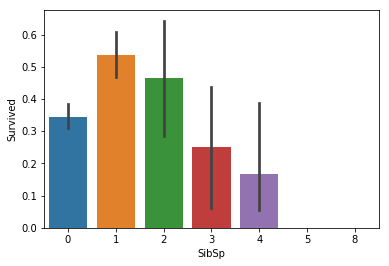

In [13]:
train.groupby(['SibSp']).mean()
sns.barplot(x='SibSp', y='Survived', data=train)

<h2>Number of Parents/Children Aboard (Parch)</h2>

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare
Parch,,,,,,,
0,445.255162,0.343658,2.321534,0.713864,31.210914,0.237463,25.586774
1,465.110169,0.550847,2.203390,0.491525,24.664576,1.084746,46.778180
2,416.662500,0.500000,2.275000,0.387500,18.834375,2.062500,64.337604
3,579.200000,0.600000,2.600000,0.200000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,0.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,0.200000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,0.000000,43.000000,1.000000,46.900000


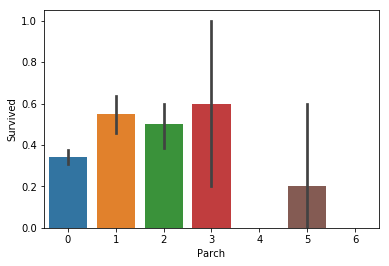

In [14]:
train.groupby(['Parch']).mean()
sns.barplot(x='Parch', y='Survived',data=train)

<h2>Fare</h2>

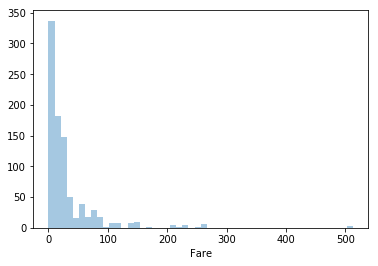

In [56]:
train.groupby(['Fare']).mean();
sns.distplot(train['Fare'], kde=False);

In [16]:
Q1 = train['Fare'].quantile(0.25)
Q3 = train['Fare'].quantile(0.75)
IQR = Q3 - Q1
print(IQR, Q1, Q3)

23.0896 7.9104 31.0


"The Freedman-Diaconis rule..."

https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram

In [17]:
h = 2*IQR/(train['PassengerId'].count()**(1/3)) #bin width
h #bin width
w1 = (train['Fare'].max() - train['Fare'].min())/h
w1 #number of bins :( 
w2 = (train['Fare'].max() - train['Fare'].min())/20
w2

4.799034112500582

106.75673229024956

25.61646

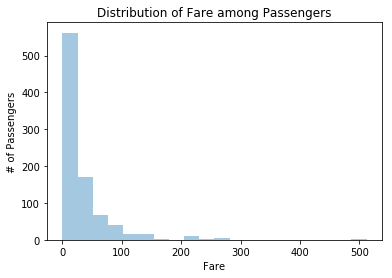

In [18]:
train.groupby(['Fare']).mean();
fare_dist = sns.distplot(train['Fare'],bins=20,kde=False);
fare_dist.set_title('Distribution of Fare among Passengers');
fare_dist.set_ylabel('# of Passengers');
#Still haven't got a mind to make Fare histogram look better. May treat dimensionality reduction with Pclass

<h1>Embarked</h1>

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,,
C,445.357143,0.553571,1.886905,0.565476,30.178095,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,0.532468,28.032468,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,0.684783,29.243401,0.571429,0.413043,27.079812


Embarked,C,Q,S
Pclass,,,
1,0.694118,0.500000,0.582677
2,0.529412,0.666667,0.463415
3,0.378788,0.375000,0.189802


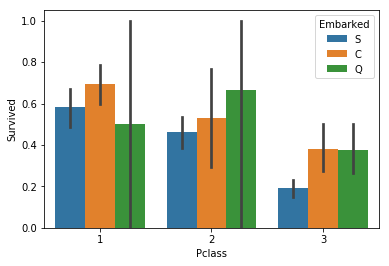

In [62]:
# To study relationship between Embarkment and other factors
train.groupby('Embarked').mean()
train.pivot_table(values='Survived', index='Pclass', columns='Embarked')
sns.barplot(x='Pclass', y='Survived', hue='Embarked', data=train)

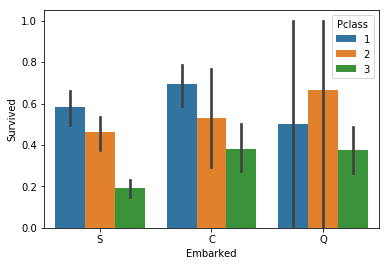

In [63]:
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=train)

People embarked on C tended pay higher fare than those on S and Q. Q tended to pay the cheapest fare.

Other factors that may relate to survival rate:

* Title of passenger
* Cabin number they belong

<h1>Pre-machine Learning Processing</h1>

Use Age, Sex and PClass to predict

In [83]:
#import scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

In [132]:
#Normalize all columns and rescale them around 0
Age_normal = (train['Age']-allage.mean())/np.sqrt(allage.var())
#Age_normal

In [133]:
# Concatenate outcome with predictors
X = pd.concat([train['Pclass'],Age_normal,train['Sex']],axis=1)
X.head(5)

,Pclass,Age,Sex
0,3,-0.546789,1
1,1,0.563282,0
2,3,-0.269271,0
3,1,0.355144,0
4,3,0.355144,1


In [134]:
#Split a portion of train set into dev set randomly 
#such that size of train:size of dev ~ 7:3
X_train, X_dev, Y_train, Y_dev = train_test_split(X, train['Survived'], test_size=0.3)

In [135]:
#Display some data
X_dev.count()

Pclass    268
Age       268
Sex       268
dtype: int64

<h1>KNN</h1>

In [136]:
neigh = KNeighborsClassifier() #neigh is so-called coz KNN groups classification by the closest neighbours

In [137]:
neigh.fit(X_train,Y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [138]:
Y_hat = neigh.predict(X_dev)

In [139]:
Y_hat #So now I have some survival prediction?

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0])

In [140]:
#Accuracy of prediction
sum(Y_dev==Y_hat)/Y_dev.count()

0.7985074626865671

<h1>Export</h1>

In [142]:
#Also normalize Age column for X_test
Age_normal = (test['Age']-allage.mean())/np.sqrt(allage.var())

In [145]:
X_test = pd.concat([test['Pclass'],Age_normal, test['Sex']], axis=1)

In [147]:
X_test.head(5)

,Pclass,Age,Sex
0,3,0.320454,1
1,3,1.187697,0
2,2,2.228388,1
3,3,-0.199892,1
4,3,-0.546789,0


In [148]:
#Now run neigh.predict() for X_test
Y_hat = neigh.predict(X_test)

In [149]:
Survived = pd.Series(Y_hat, name = 'Survived')

In [150]:
Survived

0      0
1      0
2      0
3      1
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     1
13     0
14     1
15     1
16     0
17     0
18     1
19     0
20     0
21     0
22     1
23     0
24     1
25     0
26     1
27     0
28     0
29     0
      ..
388    0
389    0
390    0
391    1
392    0
393    0
394    0
395    1
396    0
397    1
398    0
399    0
400    1
401    0
402    1
403    0
404    1
405    0
406    0
407    0
408    1
409    0
410    1
411    1
412    1
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [151]:
test['PassengerId']

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [152]:
output = test['PassengerId'].to_frame().join(Survived.to_frame())

In [153]:
output;

In [154]:
output.to_csv('solution.csv', index=False)

April 2:
'Your Best Entry 
You advanced 132 places on the leaderboard!
Your submission scored 0.72248, which is an improvement of your previous score of 0.69856. Great job!'